<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
<div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite-Difference Method - First Derivative</div>
        </div>
    </div>
</div>

#### This exercise covers the following aspects:

* Calculation of numerical first derivative
* Comparison with analytical solution 
* Dependence of error on space increment

In [1]:
# Import Libraries
import numpy as np
from math import *
import matplotlib.pyplot as plt

We initialize a space-dependent *sin* function

\begin{equation}
f(x)= \sin (k x)
\end{equation}

where the wavenumber k is

\begin{equation}
k = \dfrac{2 \pi}{\lambda}
\end{equation}

and $\lambda$ is wavelength.

In [2]:
# Initial parameters
xmax = 10.0                     # physical domain (m)
nx = 200                        # number of samples    
dx = xmax/(nx-1)                # grid increment dx (m)
x  = np.linspace(0,xmax,nx)     # space coordinates

# Initialization of sin function
l = 20*dx     # wavelength
k = 2*pi/l    # wavenumber
f = np.sin(k*x)

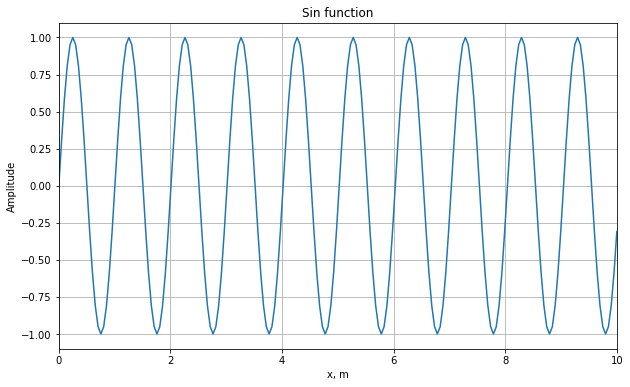

In [3]:
# Plot sin function
plt.figure(figsize=(10,6))
plt.plot(x, f)
plt.title('Sin function')
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.xlim((0, xmax))
plt.grid()
plt.show()

In the cell below we calculate the central finite-difference derivative of f(x) using two points

\begin{equation} 
f^{\prime}(x)=\dfrac{f(x+dx)-f(x-dx)}{2dx}
\end{equation} 

and  compare with the analytical derivative

\begin{equation} 
f^{\prime}(x) = k \cos(k x)
\end{equation} 

In [4]:
# First derivative with two points

# Initiation of numerical and analytical derivatives 
nder=np.zeros(nx)          # numerical derivative
ader=np.zeros(nx)          # analytical derivative

# Numerical derivative of the given function
for i in range (1, nx-1):
    nder[i]=(f[i+1]-f[i-1])/(2*dx)

# Analytical derivative of the given function
ader= k * np.cos(k*x)   
# Exclude boundaries
ader[0]=0.
ader[nx-1]=0.

# Error (rms) 
rms = np.sqrt(np.mean((nder-ader)**2))

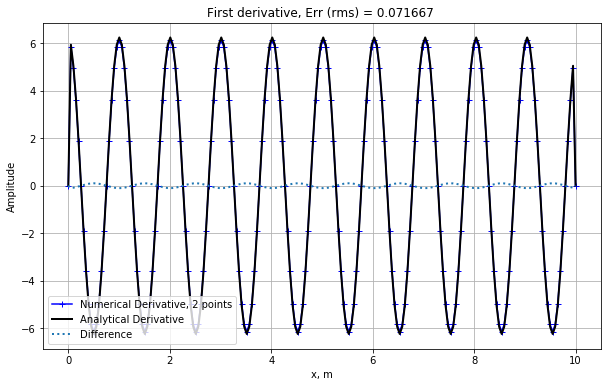

In [5]:
# Plotting 
# ----------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot (x, nder,label="Numerical Derivative, 2 points", marker='+', color="blue")
plt.plot (x, ader, label="Analytical Derivative", lw=2, ls="-",color="black")
plt.plot (x, nder-ader, label="Difference", lw=2, ls=":")
plt.title("First derivative, Err (rms) = %.6f " % (rms) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

#### The concept of number of points per wavelength

\begin{equation}
n_\lambda = \dfrac{\lambda}{dx}
\end{equation}

How does the error of the numerical derivative change with the number of points per wavelength?

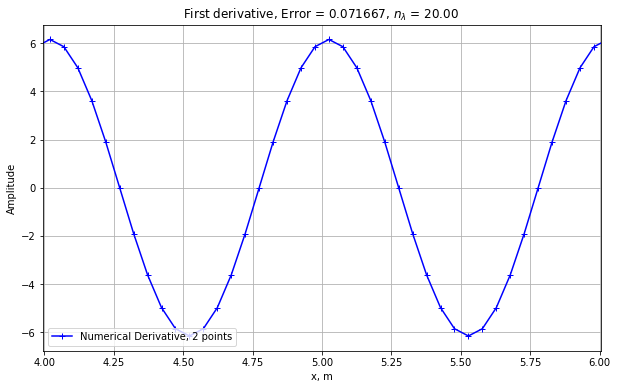

In [6]:
# Plotting number of points per wavelength
plt.figure(figsize=(10,6))
plt.plot (x, nder,label="Numerical Derivative, 2 points", marker='+', color="blue")
plt.title("First derivative, Error = %.6f, $n_\lambda$ = %.2f " % ( rms, l/dx) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.xlim((xmax/2-l,xmax/2+l))
plt.grid()
plt.show()

#### Investigate the error as a function of grid points per wavelength

In [7]:
# Define a range of number of points per wavelength: [nmin=4,5,6 ... ,nmax=40]
# Loop over points, calculate corresponding wavelength and calculate error

# Initialize vectors
nmin=3
nmax=40
na =  np.zeros(nmax-nmin+1)    # Vector with number of points per wavelength
err = np.zeros(nmax-nmin+1)    # Vector with error

j = -1  # array index


# Loop through finite-difference derivative calculation
for n in range (nmin,nmax+1):
    
    j = j+1   # array index
    na[j] = n

    
    # Initialize sin function
    l = na[j]*dx  # wavelength
    k = 2*pi/l    # wavenumber
    f = np.sin(k*x)

    # Numerical derivative of the sin function
    for i in range (1, nx-1):
        nder[i]=(f[i+1]-f[i-1])/(2*dx)

    # Analytical derivative of the sin function
    ader= k * np.cos(k*x)   
    # Exclude boundaries
    ader[0]=0.
    ader[nx-1]=0.

    # Error (rms) 
    err[j] = np.sum((nder-ader)**2)/np.sum((ader**2)) * 100

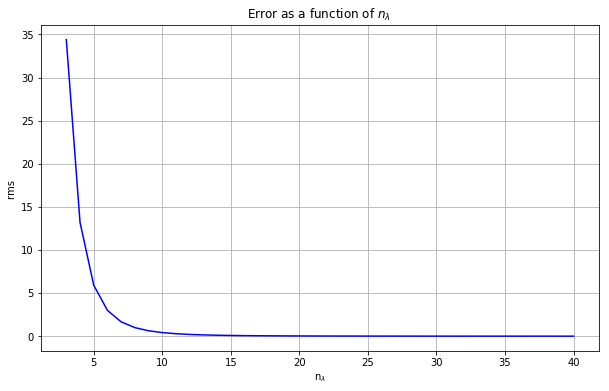

In [8]:
# ----------------------------------------------------------------
# Plotting error as function of number of points per wavelength
plt.figure(figsize=(10,6))
plt.plot(na,err, ls='-', color="blue")
plt.title('Error as a function of $n_\lambda$ ')
plt.xlabel('n$_\lambda$')
plt.ylabel('rms ')
plt.grid()
plt.show()

### Conclusions

* 2-point finite-difference approximations can provide  estimates of the 1st derivative of a function
* The accuracy depends on the "number of points per wavelength", i.e., how well we sample the original function
* The more points we use the more accurate is the derivative approximation